# ECON 441B LAB ASSIGNMENT WEEK 9

## BY: RHEA SETHI

# 0.) Import and Clean data

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [10]:
#/content/gdrive/MyDrive/Econ441B/Country-data.csv
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
df.shape

(167, 10)

In [12]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [14]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [70]:
#Picking K=5

kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [71]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

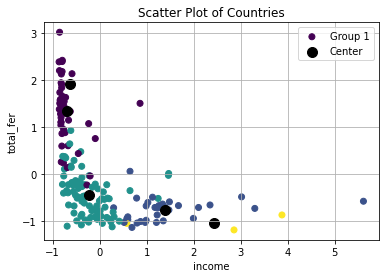

In [73]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU

#Visualizing 'income' and 'total fertility'
x1_index = 4
x2_index = 7


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Countries')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

We see 5 clusters in the above graph in the form of 5 different colours, since we set our K= 5 while fitting the model. 

Some points having similar ranges of income and total fertility in the above graph may also belong to different clusters owing to a difference in their values for the other features that are not represented in the above 2-D graph.

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [24]:
#Checking range of K clusters and storing corresponding WCSS

WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init = 30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

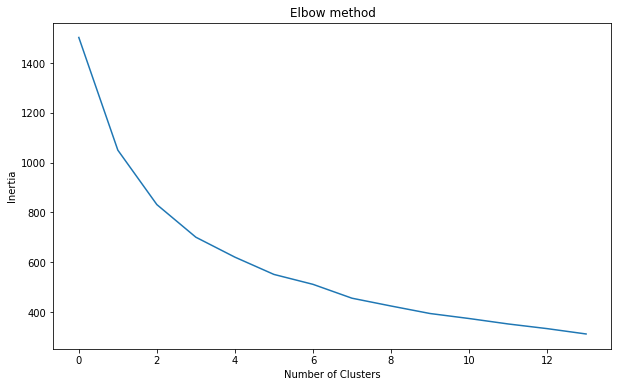

In [29]:
#Plotting WCSS against number of clusters

plt.figure(figsize = (10,6))
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [46]:
#Clustering based on development status and WCSS

k = 3 

In [47]:
kmeans = KMeans(n_clusters= k
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


I choose K= 3 based on the WCSS/Inertia as well as my economic intuition. 

Based on the Elbow method, we see that the WCSS stops decreasing by a lot after K=3. Hence, this is the "elbow" I choose. 

Based on economic intuition, since we are dealing with economic data, I cluster countries into 3 levels of development- highly developed countries, developing countries and least developed countries. One would expect countries at the same level of development to have similar performance on economic indicators such as the ones in our data.

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [63]:
#Making cluster predictions for countries

preds = pd.DataFrame(kmeans.predict(X_scaled))
preds.columns = ["Cluster"]

In [65]:
#Concatenating country names and their cluster prediction

output = pd.concat([preds, names], axis = 1)
output

,Cluster,country
0,1,Afghanistan
1,2,Albania
2,2,Algeria
3,1,Angola
4,2,Antigua and Barbuda
...,...,...
162,2,Vanuatu
163,2,Venezuela
164,2,Vietnam
165,1,Yemen


In [53]:
cluster_1 = list(output[output[0]==0]["country"])
cluster_2 = list(output[output[0]==1]["country"])
cluster_3 = list(output[output[0]==2]["country"])

In [57]:
print("Cluster 1:")
cluster_1

Cluster 1:


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [58]:
print("Cluster 2:")
cluster_2

Cluster 2:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [59]:
print("Cluster 3:")
cluster_3

Cluster 3:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

As expected, the clusters seem to separate countries into 3 groups of different levels of economic development.  

The first cluster groups developed countries together like United States, United Kingdom, Singapore since these would have similar economic performance. 

The second cluster groups the least developed countries together like Lesotho, Afghanistan, Sierra Leone.

The third cluster groups developing countries together like India, China, Vietnam.

It's also interesting to see how most of the countries in the first cluster come from North America and Europe, which are considered to be the richest regions of the world. Most of those in the second cluster come from Africa, considered to be one of the poorest regions, and the third cluster mostly has countries from Asia which is where the developing world is concentrated.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [66]:
clustered_df = pd.concat([preds,X], axis =1)

In [68]:
clustered_df.groupby("Cluster").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [69]:
clustered_df.groupby("Cluster").std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777
1,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925
2,13.757919,19.029182,2.167233,20.103873,8180.073696,7.849516,3.960745,0.696957,5021.434052


# Q7.) Write an observation about the descriptive statistics.

The descriptive statistics for the clusters conform to our expectations and intuition based on which we chose the number of clusters. 

For the 1st cluster, wherein we have highly developed countries, the economic indicators seem to be positive. For example, income, GDP per capita, life expectancy are high, whilst child mortality, total fertility and inflation are are low. 

For the 2nd cluster, which is at the opposite end of the spectrum with the least developed countries, the economic data is not very rosy. For example, income, GDP per capita, life expectancy are low , whilst child mortality, total fertility and inflation are quite high at 5 and 12% respectively.

The 3rd cluster falls in the middle with developing countries. They perform better on economic indicators than the second cluster but worse compared to the first cluster. For example, income for this cluster is ~12305 which is higher than the second cluster but lower than the first. 